In [3]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Define transforms
transform = transforms.Compose([
    transforms.ToTensor(),    # Convert the image to a PyTorch tensor
    transforms.Normalize((0.5,), (0.5,))    # Normalize the tensor to range [-1, 1]
])


In [5]:
# Create training set and define training dataloader
train_set = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)


In [6]:
# Create test set and define test dataloader
test_set = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=False)

ToTensor(): A critical preprocessing step for transforming picture data into a PyTorch tensor is the ToTensor() transform. The main data format for computing in the PyTorch and deep learning frameworks is PyTorch tensors. We can execute mathematical operations on the images and effectively train neural networks by using PyTorch's robust GPU acceleration by converting the images to tensors.

Normalization: Improving the training and convergence of neural networks through normalization is an important preprocessing step. Normalization reduces the pixel values in image data to a standard range, typically [0, 1] or [-1, 1]. According to MNIST, the normalization normally entails dividing the pixel values by 255 (the highest pixel value in the grayscale image), which yields pixel values between 0 and 1. Bringing about the

In [7]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show4(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

5


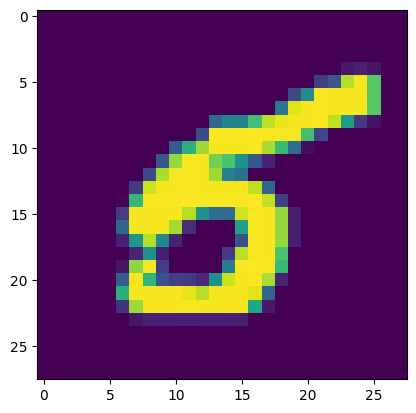

3


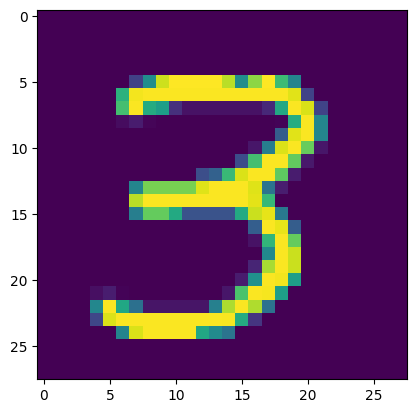

5


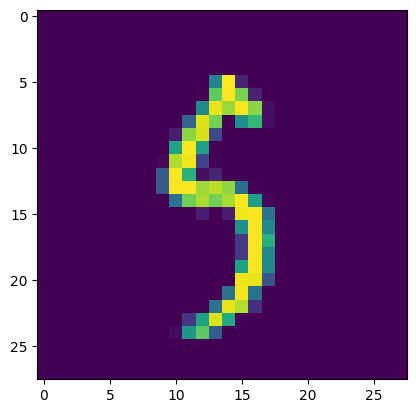

0


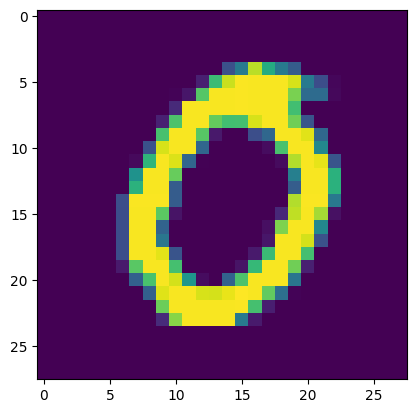

9


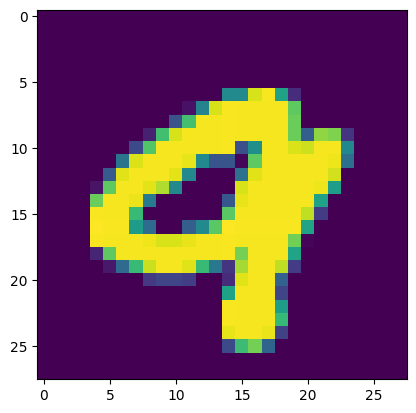

7


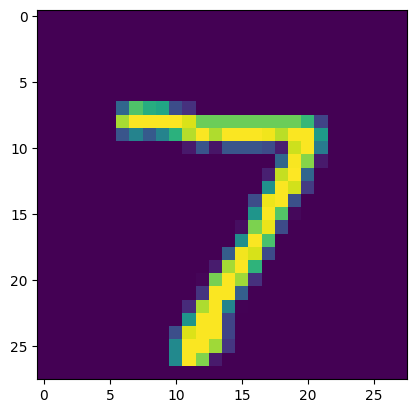

2


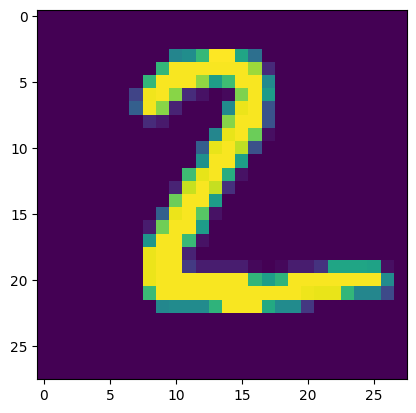

1


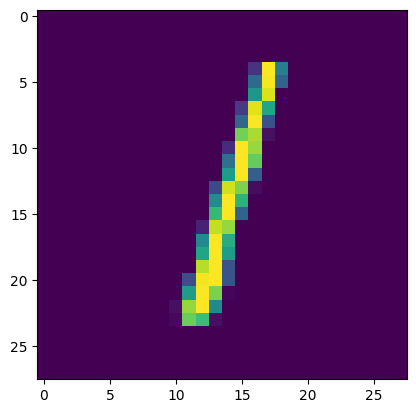

0


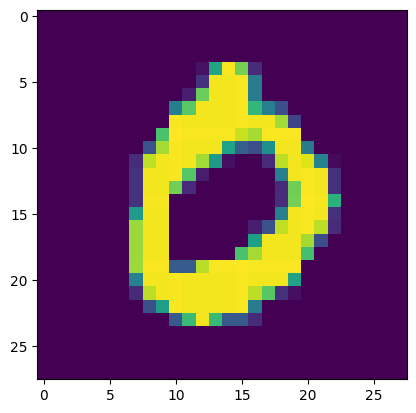

4


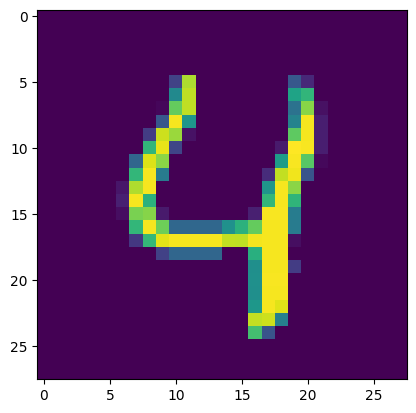

In [8]:
show4(train_loader)  # Show 5 sample images from the training set
show4(test_loader)   # Show 5 sample images from the test set

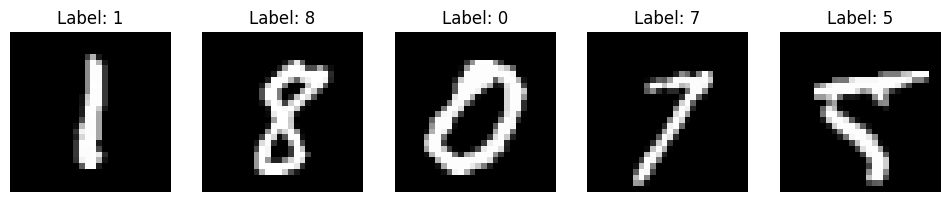

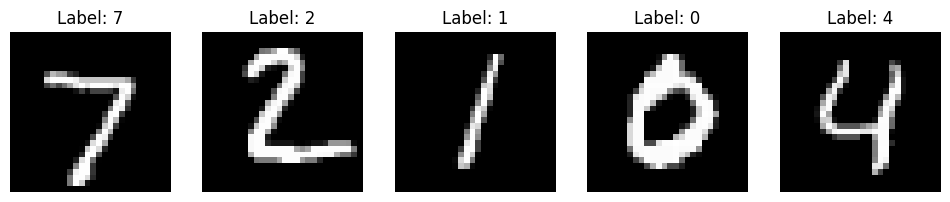

In [9]:

# i update the function for better view
def show5(data_loader):
    data_iter = iter(data_loader)
    images, labels = next(data_iter)  

    fig, axes = plt.subplots(1, 5, figsize=(12, 3))
    for i, ax in enumerate(axes):
        image = images[i].numpy().squeeze()
        label = labels[i].item()
        ax.imshow(image, cmap='gray')
        ax.set_title(f'Label: {label}')
        ax.axis('off')

    plt.show()

# Show 5 sample images from the training set
show5(train_loader)

# Show 5 sample images from the test set
show5(test_loader)

# building neural network 

In [10]:
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.flatten = nn.Flatten()  # Flatten layer to convert 2D image data to 1D before feeding into the fully connected layers
        self.fc1 = nn.Linear(28 * 28, 128)  # Input layer (28x28 flattened images) -> Hidden layer with 128 units
        self.fc2 = nn.Linear(128, 64)  # First Hidden layer -> Second Hidden layer with 64 units
        self.fc3 = nn.Linear(64, 10)  # Second Hidden layer -> Output layer with 10 units (for 10 classes)

    def forward(self, x):
        x = self.flatten(x)  # Flatten the input images
        x = F.relu(self.fc1(x))  # Apply ReLU activation to the first hidden layer
        x = F.relu(self.fc2(x))  # Apply ReLU activation to the second hidden layer
        x = self.fc3(x)  # Output layer (no activation function as it's used for classification)
        return x

# Create an instance of the SimpleNet model
model = SimpleNet()

# Print the model architecture
print(model)





SimpleNet(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


In [11]:
# loss function specification

import torch.optim as optim

# Loss function (cross-entropy loss)
criterion = nn.CrossEntropyLoss()

# Optimizer (Stochastic Gradient Descent - SGD)
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Instantiate the model
model = SimpleNet()

# Print the model architecture
print(model)


SimpleNet(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


In [12]:
# Training loop
num_epochs = 10
print_every = 250  

In [13]:

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0

    for batch_idx, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs, labels  # Move data to the device

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if (batch_idx + 1) % print_every == 0:
            print(f"Epoch [{epoch + 1}/{num_epochs}], Batch [{batch_idx + 1}/{len(train_loader)}], Loss: {running_loss / print_every:.4f}")
            running_loss = 0.0

# Finished training
print("Training finished!")

# Evaluate the model on the test set
model.eval()  
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs, labels
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy on the test set: {100 * correct / total:.2f}%")

Epoch [1/10], Batch [250/938], Loss: 2.3125
Epoch [1/10], Batch [500/938], Loss: 2.3125
Epoch [1/10], Batch [750/938], Loss: 2.3127
Epoch [2/10], Batch [250/938], Loss: 2.3129
Epoch [2/10], Batch [500/938], Loss: 2.3116
Epoch [2/10], Batch [750/938], Loss: 2.3129
Epoch [3/10], Batch [250/938], Loss: 2.3118
Epoch [3/10], Batch [500/938], Loss: 2.3118
Epoch [3/10], Batch [750/938], Loss: 2.3125
Epoch [4/10], Batch [250/938], Loss: 2.3122
Epoch [4/10], Batch [500/938], Loss: 2.3122
Epoch [4/10], Batch [750/938], Loss: 2.3138
Epoch [5/10], Batch [250/938], Loss: 2.3140
Epoch [5/10], Batch [500/938], Loss: 2.3129
Epoch [5/10], Batch [750/938], Loss: 2.3122
Epoch [6/10], Batch [250/938], Loss: 2.3127
Epoch [6/10], Batch [500/938], Loss: 2.3123
Epoch [6/10], Batch [750/938], Loss: 2.3127
Epoch [7/10], Batch [250/938], Loss: 2.3121
Epoch [7/10], Batch [500/938], Loss: 2.3134
Epoch [7/10], Batch [750/938], Loss: 2.3123
Epoch [8/10], Batch [250/938], Loss: 2.3139
Epoch [8/10], Batch [500/938], L

In [14]:
# Evaluate the model on the test set and compute accuracy
model.eval()  
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs, labels
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1) 
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy on the test set: {100 * correct / total:.2f}%")

Accuracy on the test set: 9.69%


# saving the model

In [15]:
torch.save(model.state_dict(), "ashishtraineddmodel.pt")

In [16]:
# Define the neural network class with convolutional layers
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = x.view(-1, 32 * 7 * 7)  # Flatten the tensor before the fully connected layers
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Function to train the model with different hyperparameters
def train_model(num_epochs):
    # Instantiate the model and move it to the device (GPU if available)
    model = CNN()

    # Loss function (cross-entropy loss)
    criterion = nn.CrossEntropyLoss()

    # Optimizer (Stochastic Gradient Descent - SGD) with fixed learning rate
    learning_rate = 0.01
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    # Training loop
    for epoch in range(num_epochs):
        model.train()  # Set the model to training mode
        running_loss = 0.0

        for batch_idx, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs, labels  # Move data to the device

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            # Record the average loss
            running_loss += loss.item()

        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}")

    # Finished training
    print("Training finished!")

    # Save the trained model to a file
    torch.save(model.state_dict(), "trained_model_cnn.pt")
    print("Model saved!")

    # Evaluate the model on the test set and compute accuracy
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs, labels
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)  # Get the index of the class with the highest probability
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f"Accuracy on the test set: {100 * correct / total:.2f}%")

# Try different hyperparameters
num_epochs = 10

# Train the model with the specified hyperparameters
train_model(num_epochs)

Epoch [1/10], Loss: 1.1165
Epoch [2/10], Loss: 0.2378
Epoch [3/10], Loss: 0.1506
Epoch [4/10], Loss: 0.1119
Epoch [5/10], Loss: 0.0915
Epoch [6/10], Loss: 0.0784
Epoch [7/10], Loss: 0.0694
Epoch [8/10], Loss: 0.0626
Epoch [9/10], Loss: 0.0573
Epoch [10/10], Loss: 0.0528
Training finished!
Model saved!
Accuracy on the test set: 98.31%


  ### in the above new function i use convolution layers  and now the losses are preety less as acording to the feedback results also i saved my modle using torch.save() and pssing all required arguments 

In [17]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = x.view(-1, 32 * 7 * 7)  # Flatten the tensor before the fully connected layers
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Function to train the model with different hyperparameters
def train_model(num_epochs, learning_rate):
    # Instantiate the model and move it to the device (GPU if available)
    model = CNN()

    # Loss function (cross-entropy loss)
    criterion = nn.CrossEntropyLoss()

    # Optimizer (Stochastic Gradient Descent - SGD) with adjustable learning rate
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    # Learning rate scheduler
    lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

    # Training loop
    for epoch in range(num_epochs):
        model.train()  # Set the model to training mode
        running_loss = 0.0

        for batch_idx, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs, labels # Move data to the device

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            # Record the average loss
            running_loss += loss.item()

        # Adjust learning rate after each epoch
        lr_scheduler.step()

        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}")

    # Finished training
    print("Training finished!")

    # Save the trained model to a file
    torch.save(model.state_dict(), "trained_model_cnnnew.pt")
    print("Model saved!")

    # Evaluate the model on the test set and compute accuracy
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs, labels
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)  # Get the index of the class with the highest probability
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f"Accuracy on the test set: {100 * correct / total:.2f}%")

# Try different hyperparameters
num_epochs = 15
learning_rate = 0.01

# Train the model with the specified hyperparameters
train_model(num_epochs, learning_rate)

Epoch [1/15], Loss: 0.9879
Epoch [2/15], Loss: 0.2253
Epoch [3/15], Loss: 0.1476
Epoch [4/15], Loss: 0.1115
Epoch [5/15], Loss: 0.0912
Epoch [6/15], Loss: 0.0770
Epoch [7/15], Loss: 0.0751
Epoch [8/15], Loss: 0.0739
Epoch [9/15], Loss: 0.0727
Epoch [10/15], Loss: 0.0718
Epoch [11/15], Loss: 0.0705
Epoch [12/15], Loss: 0.0703
Epoch [13/15], Loss: 0.0703
Epoch [14/15], Loss: 0.0702
Epoch [15/15], Loss: 0.0701
Training finished!
Model saved!
Accuracy on the test set: 98.01%


### used different hyper paramets like learning rate for better results  give me feedback if u feel any wrong thing i have done thanks